In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import logging
import datetime
import warnings
from lmfit.models import PseudoVoigtModel, GaussianModel
from jupyterthemes import jtplot
from matplotlib.colors import Normalize

In [3]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

In [118]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'O1s_sub' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49, 'Ba_3d_5/2' : 7.49, 'Ba_3d_3/2' : 5.20,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba4d': 2.35, 'Na1s' : 1.685, 'Cl_2s' : 0.37, 'Ru3d' : 4.273, 'Ru3p' : 1.53,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Cl2p_(2)' : 0.891, 'Cl2p_(3)' : 0.891, 'Si2p': 0.339, 'Si2s': 0.22})

asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69, }

asf3 = {'Ba_3d_5/2' : 64.3, 'Ba_3d_3/2': 49.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.50}
mfps = {'Cu2p' : 1.86, 'In3d': 3.05, 'Si2p': 3.8}

In [117]:
regss = ['O1s',  'N1s', 'C1s', 'Si2p','Si2s', 'In3d', 'Ba3d5/2', 'Cl2p', 'Ru3d5/2', 'Ru3p3/2', 'Ba4d',]
asfScof = {}
for r in regss:
    asfScof.update(search_asf(r))

asfScof

{'O1s': 0.6613995485327314,
 'N1s': 0.4063205417607223,
 'C1s': 0.2257336343115124,
 'Si2p': 0.18442437923250563,
 'Si2s': 0.21557562076749434,
 'In3d': 5.088036117381489,
 'Ba3d5/2': 5.832957110609481,
 'Cl2p': 0.5158013544018059,
 'Ru3d5/2': 1.6681715575620766,
 'Ru3p3/2': 1.530474040632054,
 'Ba4d': 1.3227990970654628}

# Preprocess data

In [63]:
path = '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/**/'
files = glob.glob(path+'*.xy')
# files += glob.glob(path+'*.xy')
files.sort()
files.pop(5)
files

['/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL/20220407_quartz_FBIG2_silatrane_BOLD073A1_BaCl2_2min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/20211220_Quartz_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/20220407_quartz_FBIG2_silatrane_BOLD073A1.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/20220407_quartz_FBIG2_silatrane_BOLD073A1_BaCl2_2min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_21_quartz_G2SL_BOLD073_A2/20220420_quartz_FBIG2_silatrane_BOLD073A2.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_26_quartz_G2SL_BOLD078_A2/20220426_quartz_FBIG2_silatrane_BOLD078A2.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_26_quartz_G2SL_BOLD078_A2/20220427_quartz_FBIG2_silatrane_BOLD078A2_BaCl2_15s.xy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_05_20_quart

In [64]:
experiments = [xps_data_import(f) for f in files[10:]]
experiments[0].name

'quartz_G2SL_glovebo'

'overview' in  quartz_G2SL_glovebo


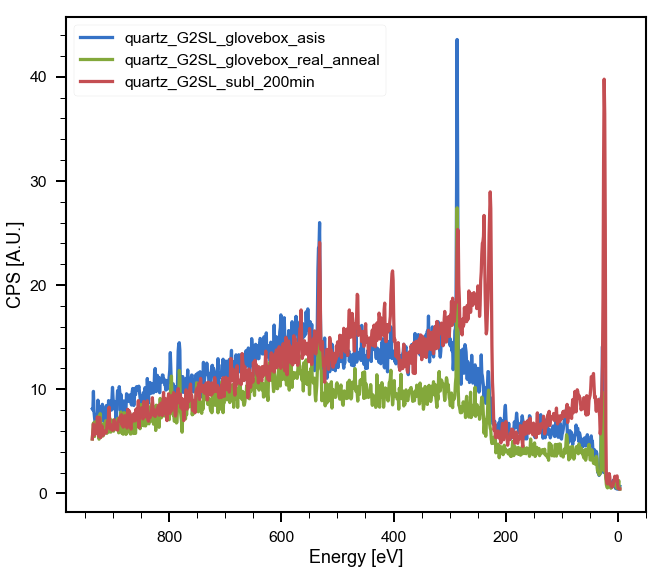

In [61]:
for xp in experiments:
    try:
        plot_region(xp, 'overview')
    except KeyError as e:
        print(e, 'in ', xp.name)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde7aa21160>,
      dtype=object)

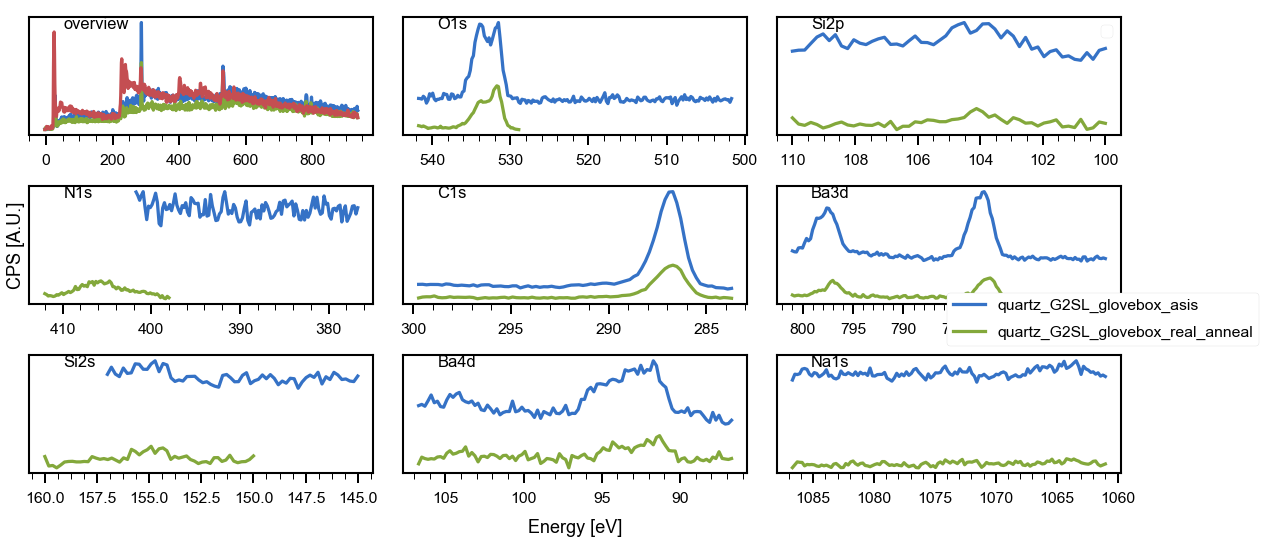

In [66]:
regs = ['overview', 'O1s', 'Si2p', 'N1s', 'C1s', 'Ba3d', 'Si2s', 'Ba4d']
plot_xp_regions(experiments, regs+['Na1s'])

In [44]:
for xp in experiments[1:-1]:
    shift = find_shift(xp, experiments[0], region='Si2p')
    align_dfx(xp, shift, inplace=True);

KeyError: 'Si2p'

quartz_G2SL_glovebo O1s
KeyError on  'O1s'
quartz_G2SL_glovebo N1s
KeyError on  'N1s'
quartz_G2SL_glovebo C1s
KeyError on  'C1s'
quartz_G2SL_glovebo Ba3d
KeyError on  'Ba3d'
quartz_G2SL_glovebo Cl2p
KeyError on  'Cl2p'
quartz_G2SL_glovebo Si2p
KeyError on  'Si2p'
quartz_G2SL_glovebo Ba4d
KeyError on  'Ba4d'
quartz_G2SL_glovebo Na1s
KeyError on  'Na1s'
quartz_G2SL_glovebox_asis O1s
quartz_G2SL_glovebox_asis N1s
quartz_G2SL_glovebox_asis C1s
quartz_G2SL_glovebox_asis Ba3d
quartz_G2SL_glovebox_asis Cl2p
KeyError on  'Cl2p'
quartz_G2SL_glovebox_asis Si2p
quartz_G2SL_glovebox_asis Ba4d
quartz_G2SL_glovebox_asis Na1s
quartz_G2SL_glovebox_real_anneal O1s
quartz_G2SL_glovebox_real_anneal N1s
quartz_G2SL_glovebox_real_anneal C1s
quartz_G2SL_glovebox_real_anneal Ba3d
quartz_G2SL_glovebox_real_anneal Cl2p
KeyError on  'Cl2p'
quartz_G2SL_glovebox_real_anneal Si2p
quartz_G2SL_glovebox_real_anneal Ba4d
quartz_G2SL_glovebox_real_anneal Na1s
quartz_G2SL_subl_200min O1s
KeyError on  'O1s'
quartz_G2SL_s

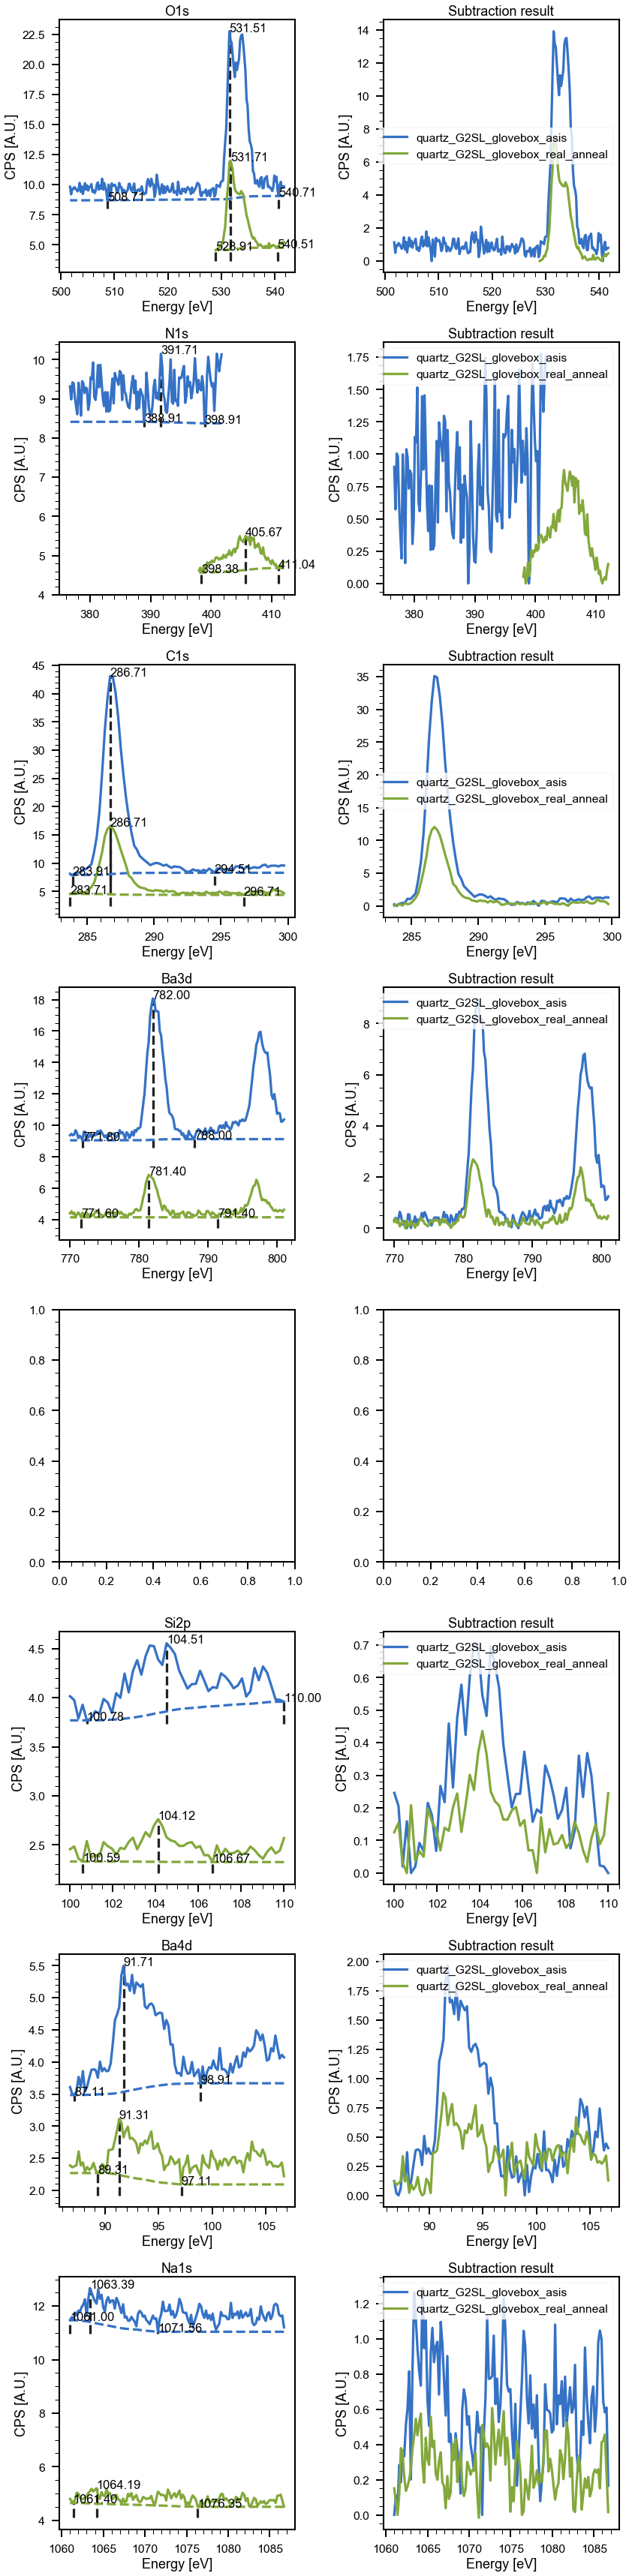

In [67]:
regions = ['O1s', 'N1s', 'C1s', 'Ba3d', 'Cl2p', 'Si2p', 'Ba4d', 'Na1s']
bg = bulk_bg_subtract(experiments, regions);

In [ ]:
bg[5] = subtract_als_bg(bg[5], 'Na1s', )

In [ ]:
bg[5] = subtract_shirley_bg(bg[5], 'Ru3p', maxit=70)

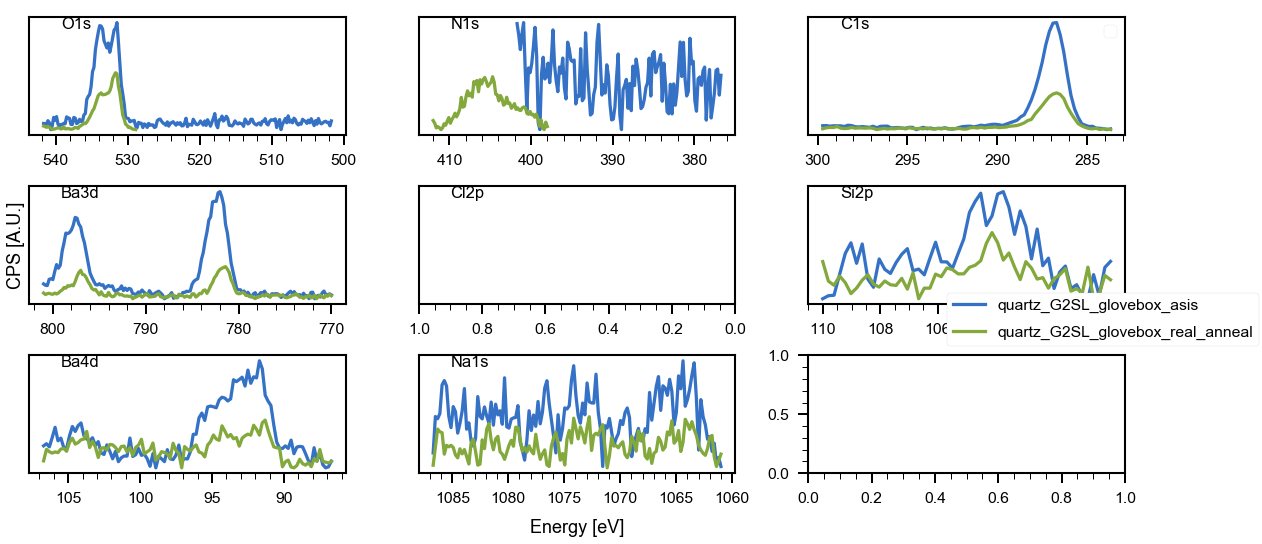

In [68]:
plot_xp_regions(bg, regions, ncols=3);

KeyError in 'O1s'


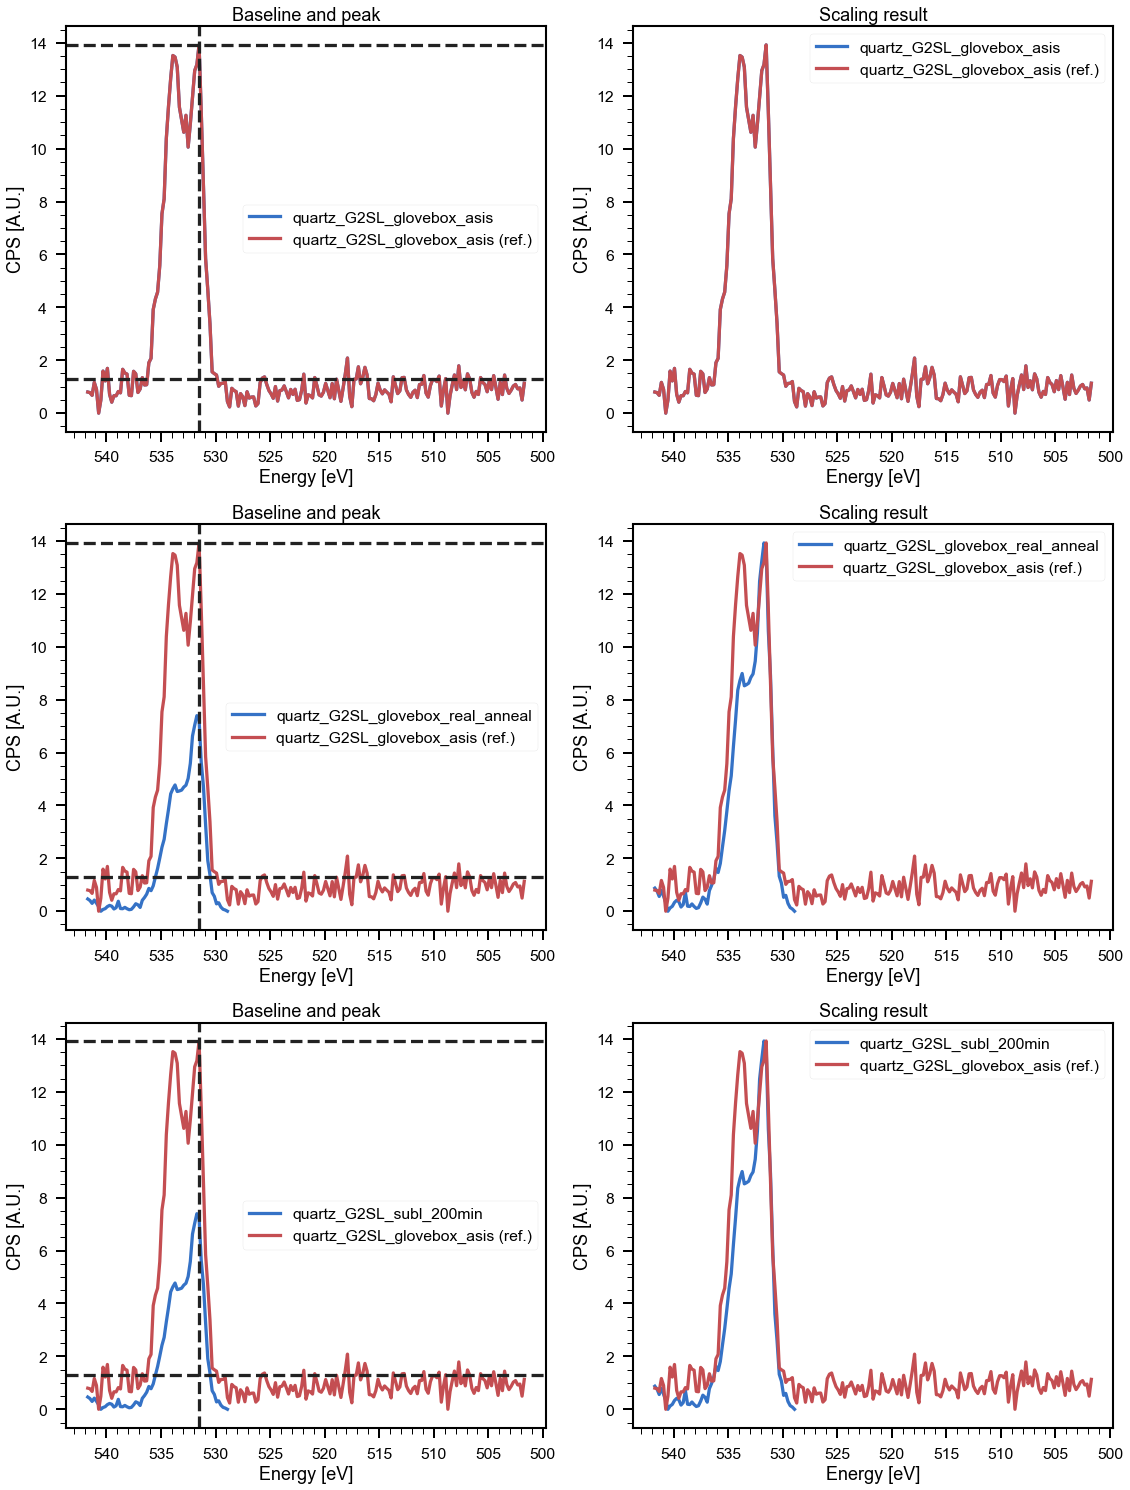

In [71]:
scaled = scale_and_plot_spectra(bg[1:], indRef=0, region='O1s')

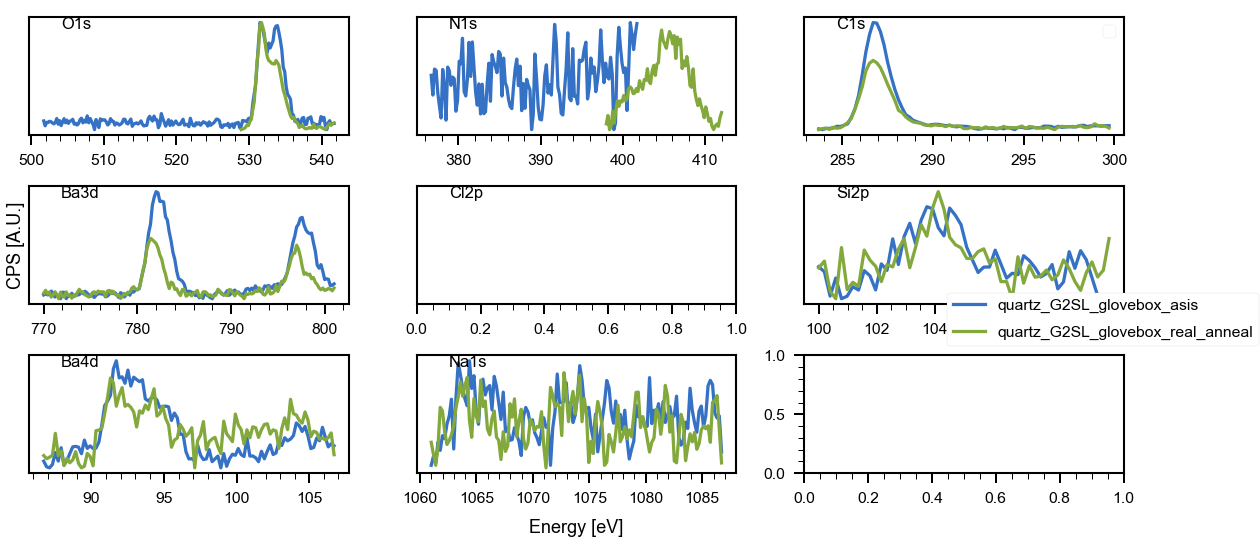

In [72]:
plot_xp_regions(scaled, regions, ncols=3);

In [ ]:
norm = []
for xp in scaled[1:]:
    norm.append(normalise_dfx(xp))
compress_noisy_region(norm[0], norm[1], 'Ba3d', inplace=True, flag_plot=False);
compress_noisy_region(norm[0], norm[1], 'Cl2p', inplace=True, flag_plot=False);

In [ ]:
norm[0].color = 'r'
norm[0].name = 'G2-SL/quartz'
norm[1].color = 'g'
norm[1].name = 'BaCl$_2$/G2-SL/quartz'

regions = ['C1s', 'N1s', 'Si2p', 'Ba3d', 'Cl2p', 'O1s']

plot_xp_regions(norm, regions, ncols=3);

In [74]:
def store_results(bg_exps: list, scaled_exps: list):

    for xpu, xps in zip(bg_exps, scaled_exps):
        filepath, filename = os.path.split(xpu.path)
        filename = os.path.splitext(filename)[0]
        newpath = filepath + '/proc/'
        try:
            os.mkdir(newpath)
        except FileExistsError: pass
        print('Stored ', newpath + filename)
        write_processed_xp(newpath + filename + '.uxy', xpu)
        write_processed_xp(newpath + filename + '.sxy', xps)


In [75]:
store_results(bg, scaled)

Stored  /Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_06_23_quartz_G2SL_glovebox_20ML/proc/20220623_quartz_G2SL_glovebox
Stored  /Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_06_23_quartz_G2SL_glovebox_20ML/proc/20220623_quartz_G2SL_glovebox_asis
Stored  /Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_06_23_quartz_G2SL_glovebox_20ML/proc/20220623_quartz_G2SL_glovebox_real_anneal


## Stoichiometry (XPS-HR)

In [77]:
path = '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/**/proc/'
files = glob.glob(path+'*.uxy')
files.sort()
files[10:]

['/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_06_23_quartz_G2SL_glovebox_20ML/proc/20220623_quartz_G2SL_glovebox_asis.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_06_23_quartz_G2SL_glovebox_20ML/proc/20220623_quartz_G2SL_glovebox_real_anneal.uxy']

In [80]:
bg = [read_processed_xp(f) for f in files[10:]]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_06_23_quartz_G2SL_glovebox_20ML/proc/20220623_quartz_G2SL_glovebox_asis.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_06_23_quartz_G2SL_glovebox_20ML/proc/20220623_quartz_G2SL_glovebox_real_anneal.uxy.ft', returning empty fit dict


In [90]:
crop_spectrum(bg[0], 'O1s', edw=529, inplace=True);

In [91]:
for xp in bg:
    xp.area = {}

'Si2s' , asf missing, returning raw area
'Si2s' , asf missing, returning raw area


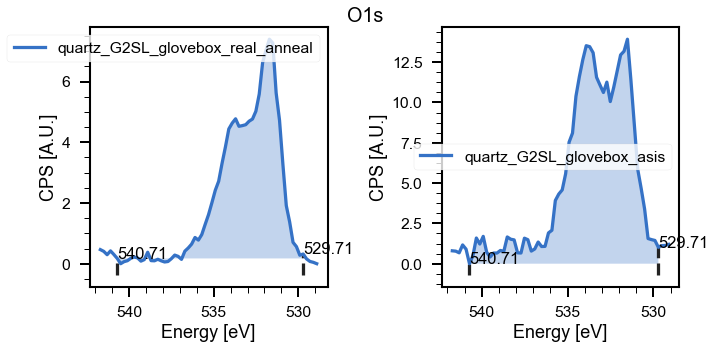

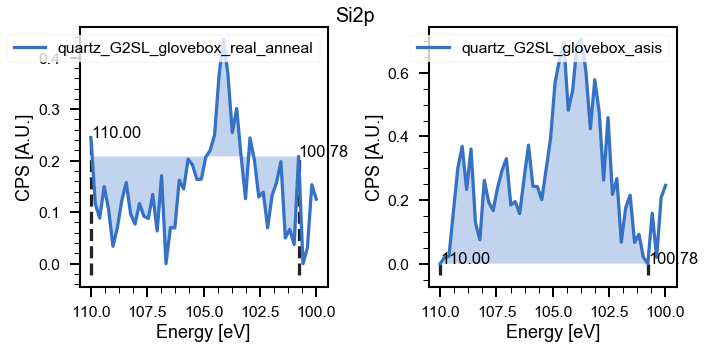

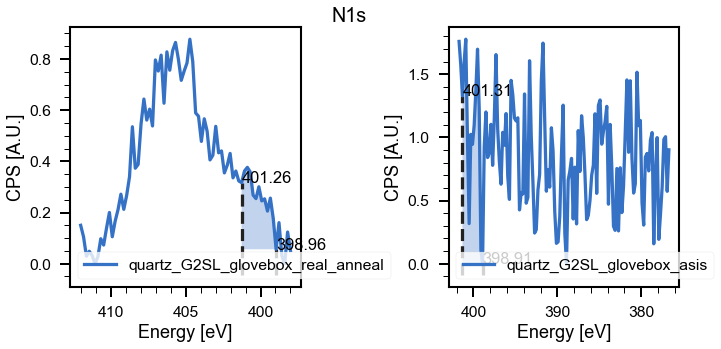

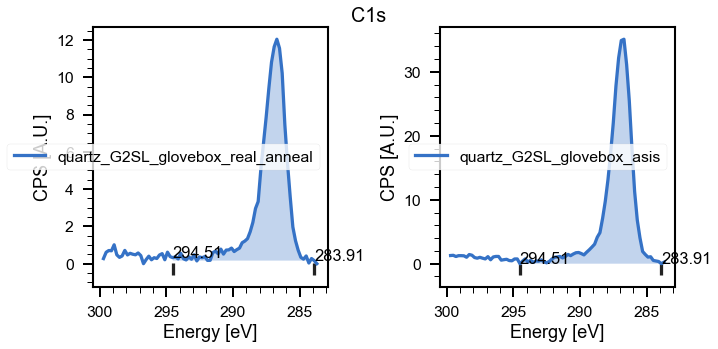

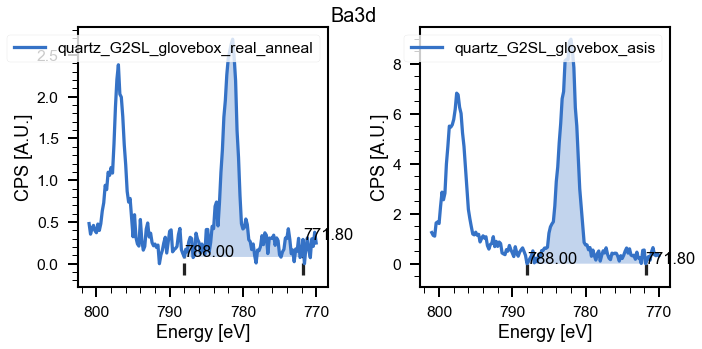

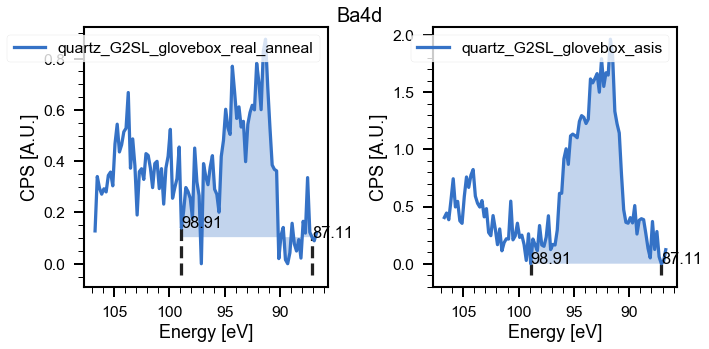

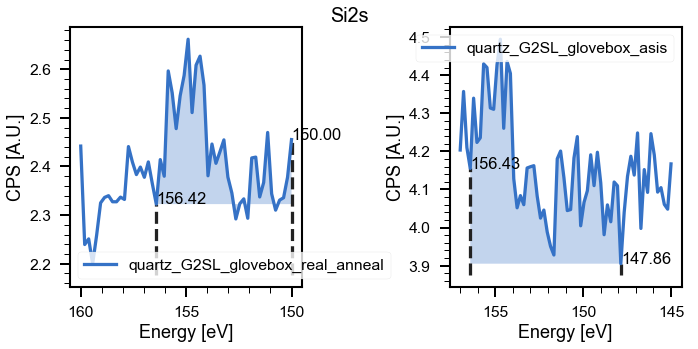

In [112]:
regs = ['O1s', 'Si2p', 'N1s', 'C1s', 'Ba3d', 'Ba4d']

for r in regs:
    integrateRegions(bg[::-1], r, asf=asf)

[2.7706549661628763, 1.4438121369114636]

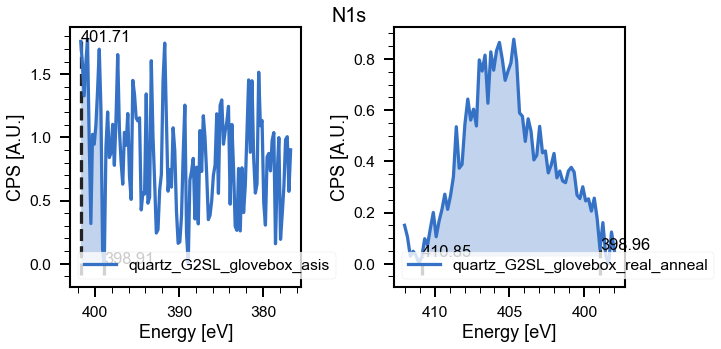

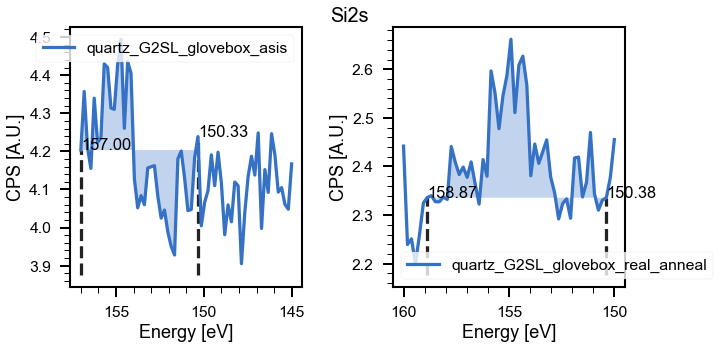

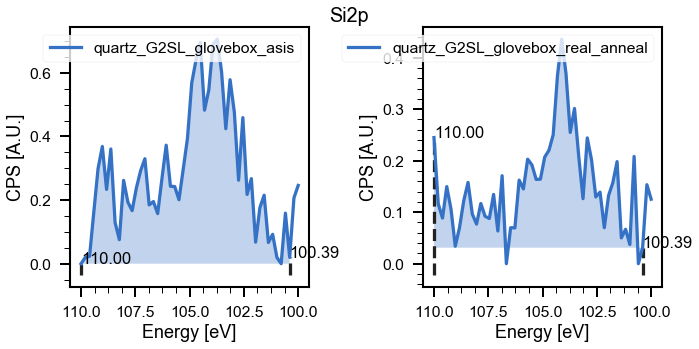

In [120]:
integrateRegions(bg, 'N1s', eup=411, edw=398.9, asf=asf)
integrateRegions(bg, 'Si2s', eup=159, edw=150.2, asf=asf)
integrateRegions(bg, 'Si2p', eup=110, edw=100.2, asf=asf)

In [124]:
a = {'C1s': 12+6+6+5+2+1+3, 'N1s': 4, 'Si2p': 1, 'O1s': 9, 'Si2s': 1, 'Ba3d': 1e-10, 'Ba4d': 1e-10, 'G2': 1, 'Na1s': 1e-10, 'Ru3p': 1e-10}
g2sl = XPS_experiment(name='Sto. G2-SL', area=a)

for xp in bg:
#     xp.area['G2'] = xp.area['N1s'] / 4
    xp.area['G2'] = xp.area['Si2p']
    

In [122]:
num = ['C1s', 'C1s', 'O1s', 'Si2p', 'Si2p', 'Si2p']
denom = ['N1s', 'O1s', 'N1s', 'N1s', 'O1s', 'C1s']
display_stoichiometry(bg+[g2sl], num, denom)

In [206]:
num = ['C1s', 'C1s', 'O1s', 'Si2p', 'Si2p', 'Si2p']
denom = ['N1s', 'O1s', 'N1s', 'N1s', 'O1s', 'C1s']
make_stoichometry_table(bg+[g2sl], num, denom)

Experiment	C/N	C/O	O/N	Si/N	Si/O	Si/C	
quartz_G2SL_glovebox_air	34.61 	 3.95 	 8.75 	 1.22 	 0.14 	 0.04 	 
quartz_G2SL_glovebox_80ºC	8.02 	 3.59 	 2.23 	 0.38 	 0.17 	 0.05 	 
Sto. G2-SL	8.75 	 3.89 	 2.25 	 0.25 	 0.11 	 0.03 	 


In [125]:
num = ['Ba3d', 'Ba4d', 'Ba3d', 'Si2p']
denom = ['G2', 'G2', 'Ba4d', 'Si2s']
display_stoichiometry(bg+[g2sl], num, denom)

## Plots

In [147]:
bg[0].name = 'quartz_G2SL_glovebox_air'
bg[1].name = 'quartz_G2SL_glovebox_80ºC'
bg[1].color = 'g'

(542, 529)

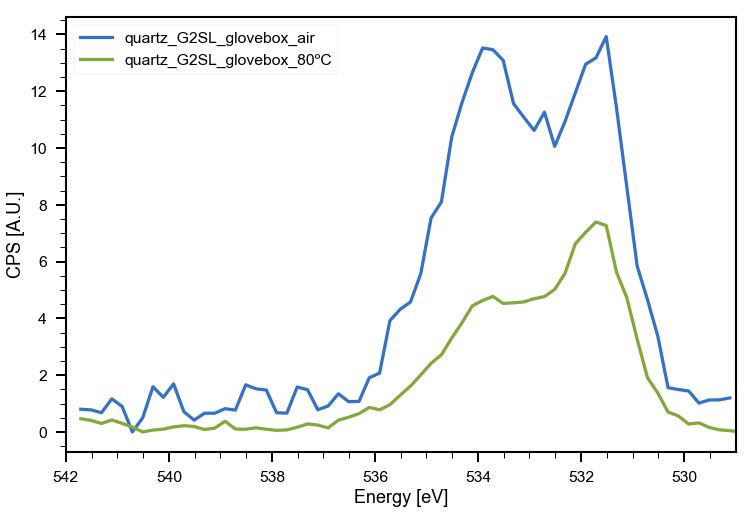

In [213]:
region = 'O1s'
plt.figure(figsize=(12, 8))
plot_region(bg[0], region)
plot_region(bg[1], region)
plt.xlim(542, 529)
# plt.gca().invert_xaxis()

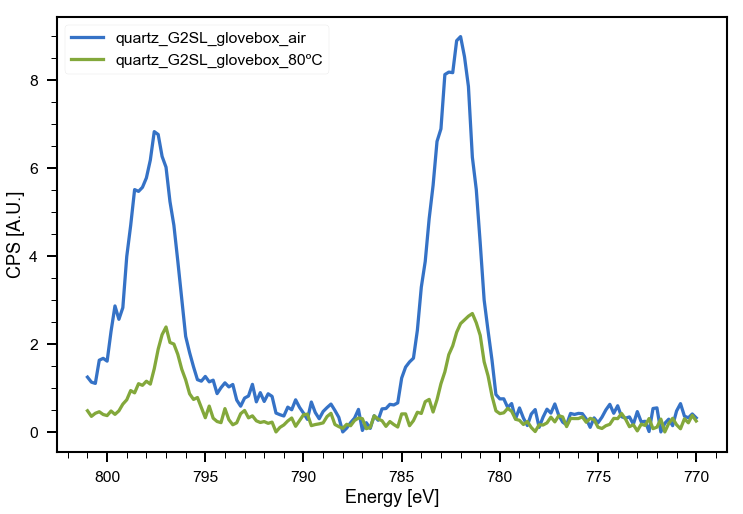

In [217]:
region = 'Ba3d'
plt.figure(figsize=(12, 8))
plot_region(bg[0], region)
plot_region(bg[1], region)
# plt.xlim(542, 529)
plt.gca().invert_xaxis()

## Fit O1s

In [169]:
bg[0].color = 'b'

Modify user pars


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdeabf3bac8>, 1.409457695618266)

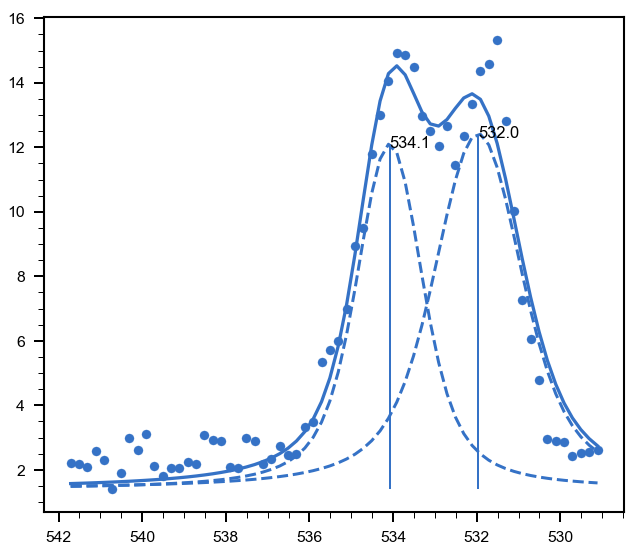

In [200]:
region = 'O1s'
xp = bg[0]
fn = XPFit(xp, region)
fn.preset_pars('v1_sigma', 0.7)
fn.double_voigt(533)
fn.set_areas()
plot_fit_result(xp, region)

Modify user pars


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdeaba655f8>, 0.5589601642776649)

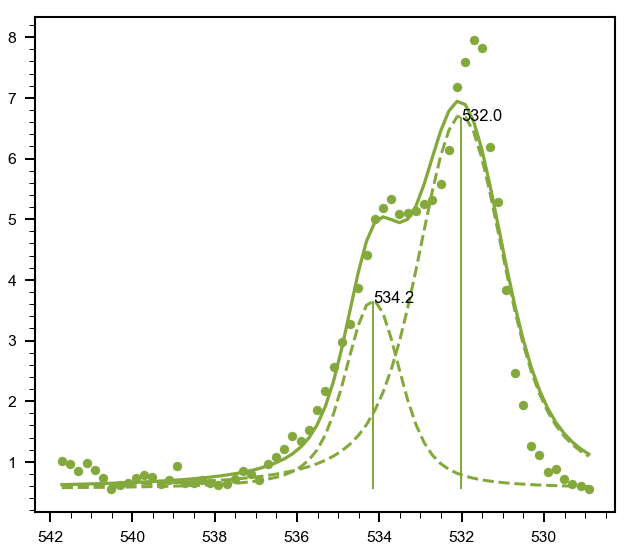

In [204]:
region = 'O1s'
xp = bg[1]
fn = XPFit(xp, region)
fn.preset_pars('v1_sigma', 0.7)
fn.double_voigt(533)
fn.set_areas()
plot_fit_result(xp, region)

In [201]:
bg[0].fit['O1s'].best_values

{'v2_amplitude': 26.90162051920382,
 'v2_center': 534.0822788945046,
 'v2_sigma': 0.5250953315307358,
 'v2_gamma': 0.5250953315307358,
 'v1_amplitude': 36.93027238516933,
 'v1_center': 531.9665761995773,
 'v1_sigma': 0.7,
 'v1_gamma': 0.7}

In [202]:
bg[0].area['O1s_v2_'] / bg[0].area['O1s_v1_']

0.7680159013873504

In [205]:
bg[1].area['O1s_v2_'] / bg[1].area['O1s_v1_']

0.3420683200326216

## Fit C 1s

In [ ]:
xp = bg[1]
xp.color = 'r'
region = 'C1s'
scale = 1

fit_n_voigt(xp, region, max_comps=4, flag_save=True)

In [ ]:
xp = bg[2]
xp.color = 'g'

region = 'C1s'
scale = 1

fit_n_voigt(xp, region, max_comps=4, flag_save=True)

In [ ]:
plot_fit_result(bg[1], region, fitRes=bg[1].fit['C1s_4comps'])
plot_fit_result(bg[2], region, fitRes=bg[2].fit['C1s_4comps'], offset=9)
plt.gca().set(xlim=(296.5,285), ylim=(0, 2e3))

## Subtract O 1s

In [ ]:
def clean_reg_subtract(exps: list, xpRef: XPS_experiment, region: str):
    """
        Subtract clean substrate contribution in region to whole set of exps.
        Store result in new dfx region as region+'_sub'
        input
        ------------
        exps: list of experiments to perform operation onto
        xpRef: XPS_experiment with clean region
        region: str
    """
    fig, ax = plt.subplots(len(exps), figsize=(6, 6*len(exps)))
    for i, xp in enumerate(exps):
        subexps = subtract_ref_region(xp, xpRef, region=region, )
        plot_region(xp, region, ax=ax[i])
        subexps.ls = '--'
        plot_region(subexps, region, ax=ax[i])
        plot_region(xpRef, region, ax=ax[i])
        ax[i].invert_xaxis()
        ax[i].legend()
        
        xp.dfx[region+'_sub', 'energy'] = subexps.dfx[region].energy
        xp.dfx[region+'_sub', 'counts'] = subexps.dfx[region].counts
    return exps

In [ ]:
clean_reg_subtract(scaled[1:], scaled[0], region='O1s')

# Stoichiometry

In [8]:
path = '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/**/proc/'
files = glob.glob(path+'*.uxy')
# files += glob.glob(path+'*.xy')
files.sort()
# files.pop(5)
files

['/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/proc/20211220_Quartz_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/proc/20220407_quartz_FBIG2_silatrane_BOLD073A1.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/proc/20220407_quartz_FBIG2_silatrane_BOLD073A1_BaCl2_2min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_21_quartz_G2SL_BOLD073_A2/proc/20220420_quartz_FBIG2_silatrane_BOLD073A2.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_21_quartz_G2SL_BOLD073_A2/proc/20220420_quartz_FBIG2_silatrane_BOLD073A2_BaCl2_15sec.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_26_quartz_G2SL_BOLD078_A2/proc/20220427_quartz_FBIG2_silatrane_BOLD078A2_BaCl2_15s.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_05_20_quartz_G2SL_BOLD078_C1/proc/20220520_quartz_FBIG2_silatrane_BOLD078C1_BaCl2_15s.uxy',
 '/U

In [9]:
bg = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/proc/20211220_Quartz_clean.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/proc/20220407_quartz_FBIG2_silatrane_BOLD073A1.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_07_quartz_G2SL_BOLD073_A1/proc/20220407_quartz_FBIG2_silatrane_BOLD073A1_BaCl2_2min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_21_quartz_G2SL_BOLD073_A2/proc/20220420_quartz_FBIG2_silatrane_BOLD073A2.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/quartz_G2SL/2022_04_21_quartz_G2SL_BOLD073_A2/proc/20220420_quartz_FBIG2_silatrane_BOLD073A2_BaCl2_15sec.uxy.ft', returni

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea9d5d278>,
      dtype=object)

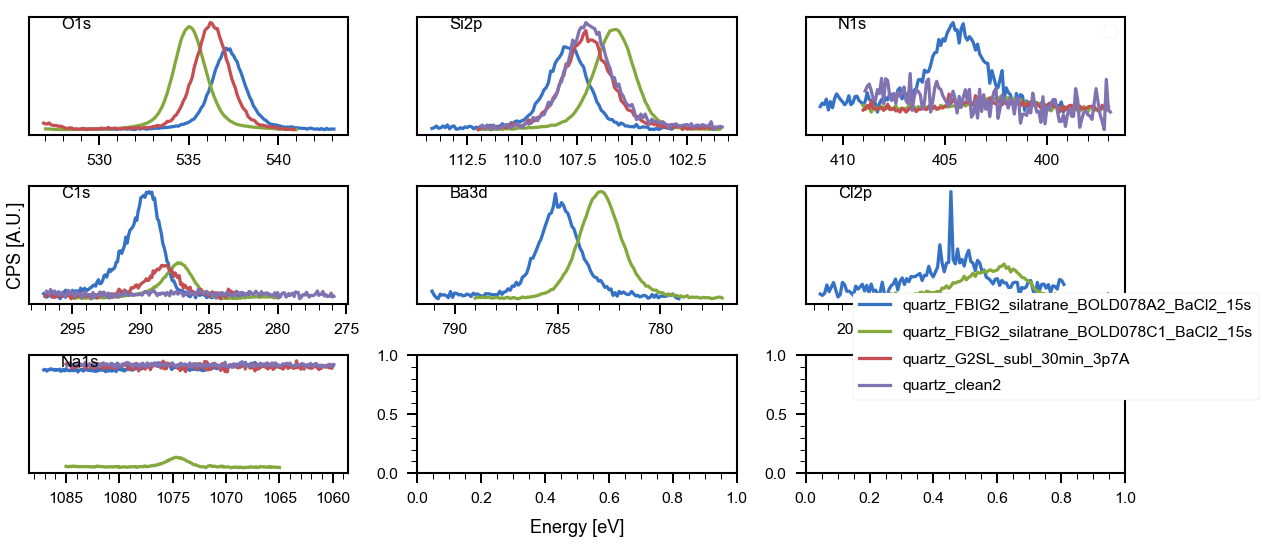

In [12]:
regs = ['O1s', 'Si2p', 'N1s', 'C1s', 'Ba3d', 'Cl2p']
plot_xp_regions(bg[5:], regs+['Na1s'])

In [43]:
for xp in bg:
    xp.area = {}

'O1s' region does not exist in quartz_G2SL_subl_30min_3p7A
'Ba3d' region does not exist in Quartz_clean
'Ba3d' region does not exist in quartz_G2SL_subl_30min_3p7A
'Ba3d' region does not exist in quartz_clean2
'Cl2p' region does not exist in Quartz_clean
'Cl2p' region does not exist in quartz_G2SL_subl_30min_3p7A
'Cl2p' region does not exist in quartz_clean2


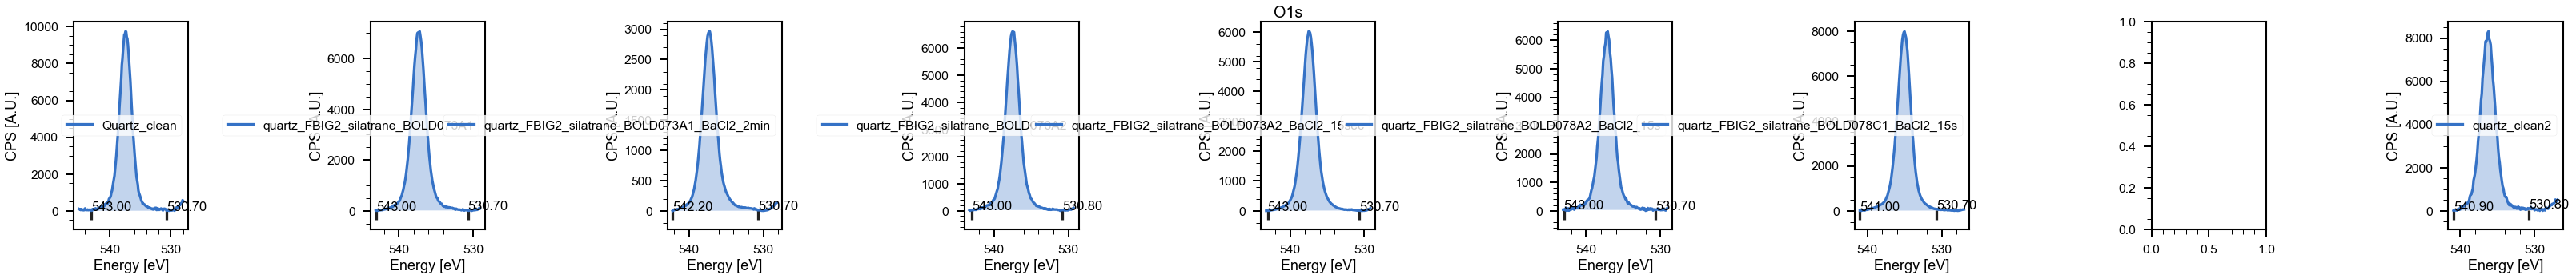

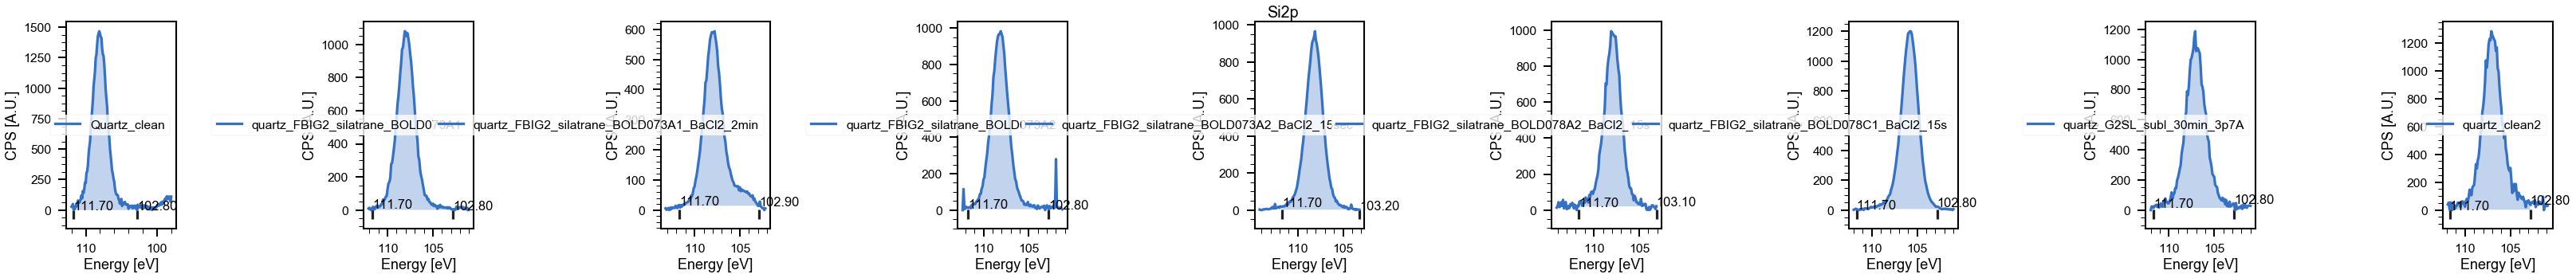

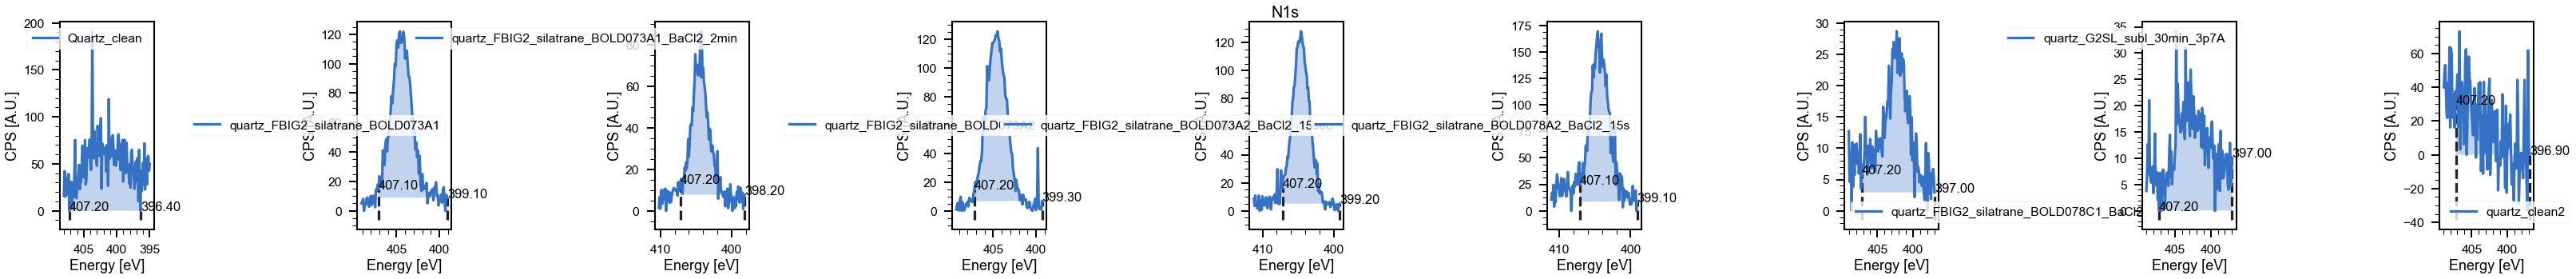

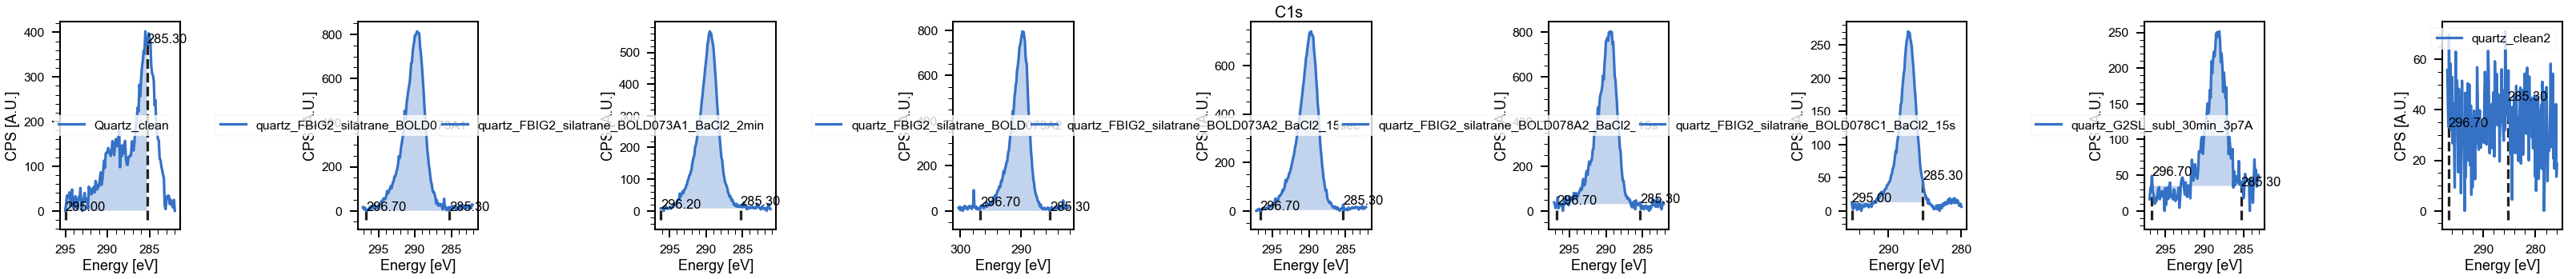

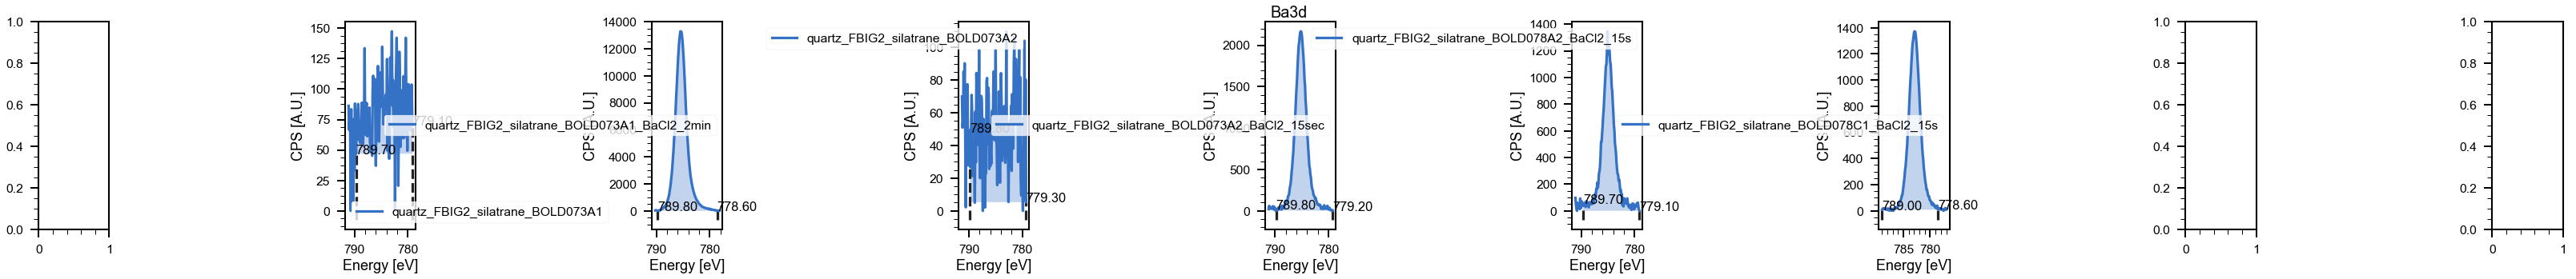

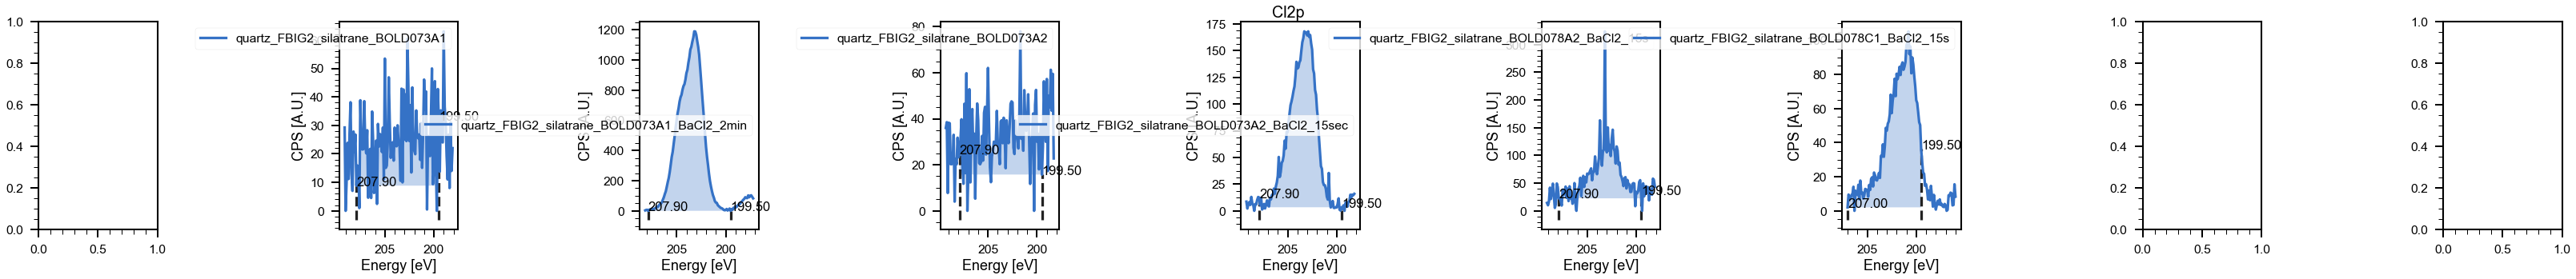

In [11]:
regs = ['O1s', 'Si2p', 'N1s', 'C1s', 'Ba3d', 'Cl2p']

for r in regs:
    integrateRegions(bg, r, asf=asf)

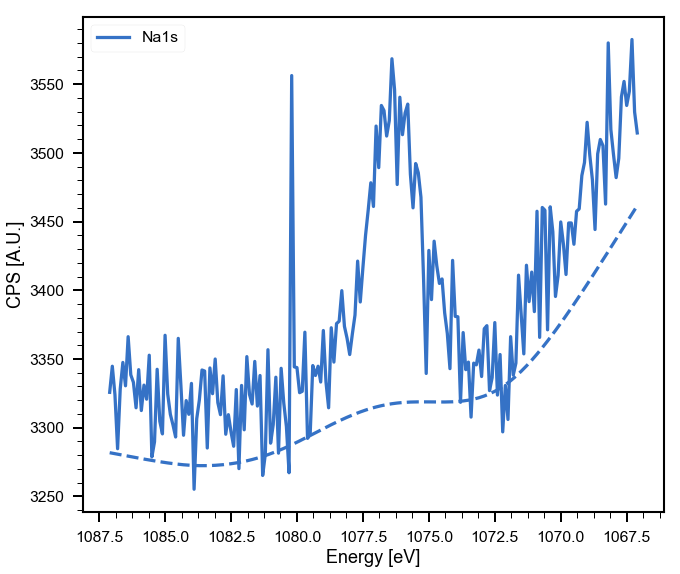

In [13]:
bg[5] = subtract_als_bg(bg[5], 'Na1s')

In [14]:
regions = list(bg[0].dfx.columns.levels[0])
for i,r in enumerate(regions):
    if '_bg' in r:
        regions.pop(i)

In [15]:
regions

['C1s', 'N1s', 'O1s', 'Si2p', 'overview']

In [16]:
regions

['C1s', 'N1s', 'O1s', 'Si2p', 'overview']

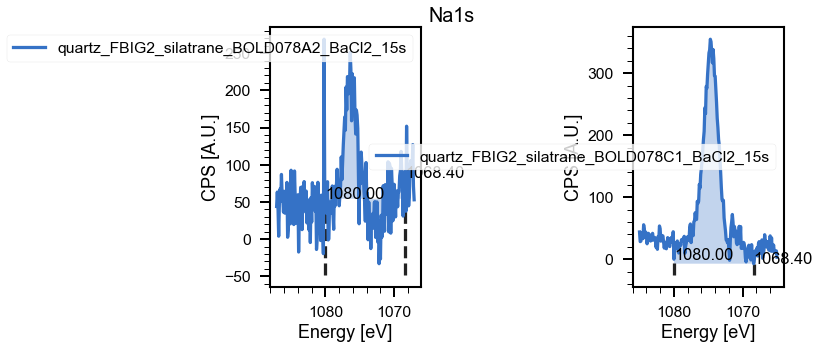

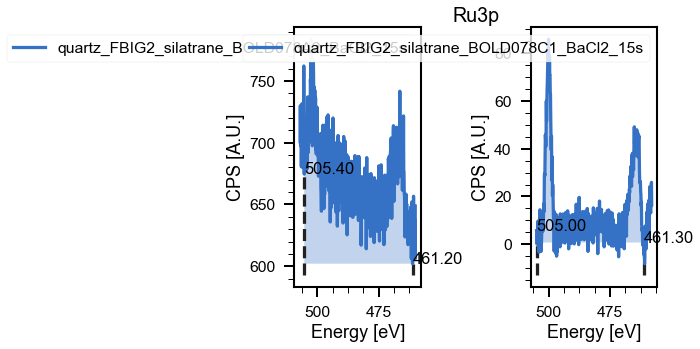

In [17]:
regs = ['Na1s', 'Ru3p']

for r in regs:
    integrateRegions([bg[5], bg[6]], r, asf=asf)

In [18]:
a = {'C1s': 12+6+6+5+2+1+3, 'N1s': 4, 'Si2p': 1, 'O1s': 9, 'Ba3d': 1e-10, 'Cl2p': 1e-10, 'G2': 1, 'Na1s': 1e-10, 'Ru3p': 1e-10}
g2sl = XPS_experiment(name='Sto. G2-SL', area=a)

for xp in bg[1:]:
    xp.area['G2'] = xp.area['N1s'] / 4


In [19]:
a

{'C1s': 35,
 'N1s': 4,
 'Si2p': 1,
 'O1s': 9,
 'Ba3d': 1e-10,
 'Cl2p': 1e-10,
 'G2': 1,
 'Na1s': 1e-10,
 'Ru3p': 1e-10}

In [20]:
num = ['C1s', 'Ba3d', 'Ba3d']
denom = ['N1s', 'Cl2p', 'G2']
display_stoichiometry(bg[1:]+[g2sl], num, denom)

In [21]:
num = ['Ba3d', 'Na1s', 'Ru3p']
denom = ['G2', 'G2', 'G2']
display_stoichiometry(bg[5:]+[g2sl], num, denom)

Na1s  or  G2  was not measured
Ru3p  or  G2  was not measured
Na1s  or  G2  was not measured
Ru3p  or  G2  was not measured


In [59]:
num = ['C1s', 'Ba3d', 'Na1s']
denom = ['N1s', 'G2', 'G2']
make_stoichometry_table(bg[5:]+[g2sl], num, denom)

Experiment	C/N	Ba/G	Na/G	
quartz_FBIG2_silatrane_BOLD078A2_BaCl2_15s	8.12 	 1.53 	 1.86 	 
quartz_FBIG2_silatrane_BOLD078C1_BaCl2_15s	9.66 	 7.21 	 9.68 	 
Sto. G2-SL	8.75 	 0.00 	 0.00 	 


# Main plots...

In [ ]:
region = 'Ba3d'
for xp in bg[3:]:
    plot_region(xp, region, lb = xp.name.replace('quartz_FBIG2_silatrane_', '').replace('_15sec', '').replace('_15s', ''))
    
plt.gca().invert_xaxis()
plt.legend(fontsize=22, loc='best')

In [ ]:
region = 'C1s'
for xp in norm[:2]:
    plot_region(xp, region, lb = xp.name.replace('quartz_FBIG2_silatrane_', ''))
    
plt.gca().set(xlim=(297.5, 281))
plt.legend(fontsize=22, loc='best')

In [ ]:
region = 'C1s'
cols = ['r', 'm']
for i,xp in enumerate(norm[2:4]):
    xp.color = cols[i]
    plot_region(xp, region, lb = xp.name.replace('quartz_FBIG2_silatrane_', ''))
    
plt.gca().set(xlim=(297.5, 285))
plt.legend(fontsize=22, loc='best')

In [ ]:
region = 'C1s'
cols = ['r', 'm', 'y']
for i,xp in enumerate(norm[2:]):
    xp.color = cols[i]
    plot_region(xp, region, lb = xp.name.replace('quartz_FBIG2_silatrane_', ''))
    
# plt.gca().set(xlim=(297.5, 285))
plt.legend(fontsize=22, loc='best')

## Other regions

In [ ]:
plot_region(bg[5], 'Na1s')
plt.gca().get_legend().remove()

In [ ]:
plot_region(bg[5], 'Ru3p')
plt.gca().get_legend().remove()

In [ ]:
fileovw = '/Users/pabloherrero/sabat/xps_spectra/quartz_FBIG2/2022_04_26_quartz_G2SL_BOLD078_A2/20220426_quartz_FBIG2_silatrane_BOLD078A2.xy'

ovw = xps_data_import(fileovw)

In [ ]:
fileru = '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2022_02_03_qITO_RuPTES_BOLD038A/20220203_qITO_PTES_Ru.xy'

ru = xps_data_import(fileru)
align_dfx(ru, shift=1.4, inplace=True)

In [ ]:
plt.rcParams['lines.linewidth'] = 1

plt.figure(figsize=(16, 8))
plot_region(ovw, 'overview')
plt.rcParams['lines.linewidth'] = 2.08


In [ ]:
plt.rcParams['lines.linewidth'] = 1

plt.figure(figsize=(8, 8))
plot_region(ovw, 'overview')
plt.gca().set(xlim=(1080, 1070), ylim=(3e3, 3.6e3))
plt.rcParams['lines.linewidth'] = 2.08


In [ ]:
plt.rcParams['lines.linewidth'] = 1

plt.figure(figsize=(8, 8))
plot_region(ovw, 'overview', offset=300)
plot_region(ru, 'C1s')

plt.gca().set(xlim=(294, 272), ylim=(0.9e3, 2.2e3))
plt.rcParams['lines.linewidth'] = 2.08


In [ ]:
plt.rcParams['lines.linewidth'] = 1

plt.figure(figsize=(12, 8))
plot_region(ovw, 'overview')
# plot_region(experiments[5], 'N1s')

plt.gca().set(xlim=(507, 396), ylim=(0.7e3, 1e3))
plt.rcParams['lines.linewidth'] = 2.08
